<a href="https://colab.research.google.com/github/Teo2601/Secante/blob/main/Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Iteración        x0        x1        x2      f(x0)      f(x1)     Error
0          0  2.000000  3.000000  2.058824  -1.000000  16.000000  0.941176
1          1  3.000000  2.058824  2.081264  16.000000  -0.390800  0.022440
2          2  2.058824  2.081264  2.094824  -0.390800  -0.147204  0.013560
3          3  2.081264  2.094824  2.094549  -0.147204   0.003044  0.000275
4          4  2.094824  2.094549  2.094551   0.003044  -0.000023  0.000002


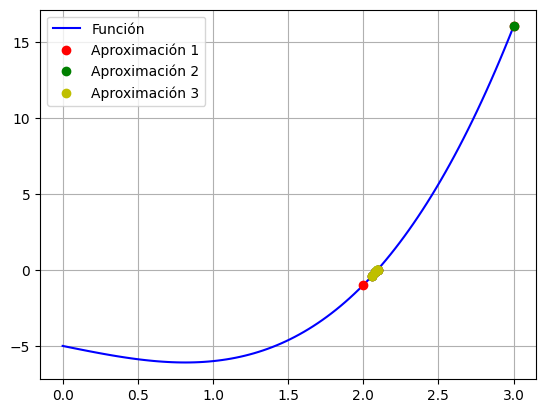

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Función a la que se le busca la raíz
def f(x):
    return x**3 - 2*x - 5

# Método de la Secante
def secante(f, x0, x1, tol, max_iter):
    iteraciones = []
    i = 0
    while i < max_iter:
        fx0 = f(x0)
        fx1 = f(x1)
        x2 = x1 - (fx1*(x1-x0))/(fx1-fx0)
        error = abs(x2-x1)
        fila = [i, x0, x1, x2, fx0, fx1, error]
        iteraciones.append(fila)
        if error < tol:
            break
        x0 = x1
        x1 = x2
        i += 1
    return pd.DataFrame(iteraciones, columns=['Iteración', 'x0', 'x1', 'x2', 'f(x0)', 'f(x1)', 'Error'])

# Parámetros de entrada
x0 = 2
x1 = 3
tol = 0.0001
max_iter = 10

# Encontrar la raíz usando el Método de la Secante
tabla = secante(f, x0, x1, tol, max_iter)
print(tabla)

# Graficar la función y las aproximaciones de la raíz
x = np.linspace(0, 3, 100)
y = f(x)
plt.plot(x, y, 'b-', label='Función')
plt.plot(tabla['x0'], f(tabla['x0']), 'ro', label='Aproximación 1')
plt.plot(tabla['x1'], f(tabla['x1']), 'go', label='Aproximación 2')
plt.plot(tabla['x2'], f(tabla['x2']), 'yo', label='Aproximación 3')
plt.legend()
plt.grid()
plt.show()
